In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from scipy import stats

%matplotlib inline


In [2]:
df = pd.read_csv('HackerRank-Developer-Survey-2018-Values.csv')
df.head()

RespondentID       StartDate         EndDate CountryNumeric2  \
0    6464453728  10/19/17 11:51  10/20/17 12:05     South Korea   
1    6478031510   10/26/17 6:18   10/26/17 7:49         Ukraine   
2    6464392829  10/19/17 10:44  10/19/17 10:56        Malaysia   
3    6481629912   10/27/17 1:51   10/27/17 2:05         Curaçao   
4    6488385057  10/31/17 11:46  10/31/17 11:59             NaN   

    q1AgeBeginCoding              q2Age q3Gender  \
0  16 - 20 years old  18 - 24 years old   Female   
1  16 - 20 years old  25 - 34 years old     Male   
2  11 - 15 years old  12 - 18 years old   Female   
3  11 - 15 years old  12 - 18 years old     Male   
4  16 - 20 years old  25 - 34 years old   Female   

                           q4Education q0004_other  \
0                         Some college         NaN   
1  Post graduate degree (Masters, PhD)         NaN   
2                         Some college         NaN   
3                     College graduate         NaN   
4                     College graduate         NaN   

                                       q5DegreeFocus  ...  \
0                                   Computer Science  ...   
1  Other STEM (science, technology, engineering, ...  ...   
2  Other STEM (science, technology, engineering, ...  ...   
3                                   Computer Science  ...   
4                                                NaN  ...   

        q30LearnCodeOther                         q0030_other   q31Level3  \
0  Other (please specify)                            datacamp  num%2 == 0   
1                     NaN                                 NaN  num%2 == 0   
2                     NaN                                 NaN  num%2 == 0   
3                     NaN                                 NaN  num%2 == 0   
4  Other (please specify)  Blogs/articles by industry leaders  num%2 == 0   

  q32RecommendHackerRank q0032_other q33HackerRankChallforJob q34PositiveExp  \
0                    Yes         NaN                       No            NaN   
1                    Yes         NaN                       No            NaN   
2                    Yes         NaN                       No            NaN   
3                    Yes         NaN                       No            NaN   
4                    Yes         NaN                       No            NaN   

  q34IdealLengHackerRankTest q0035_other q36Level4  
0                     #NULL!         NaN     Queue  
1                     #NULL!         NaN     Queue  
2                     #NULL!         NaN     Queue  
3                     #NULL!         NaN   Hashmap  
4                     #NULL!         NaN   Hashmap  

[5 rows x 251 columns]

In [3]:
dfnb = pd.read_csv('HackerRank-Developer-Survey-2018-Values.csv')
dfnb.shape

(25090, 251)

In [4]:
list(df.columns)

['RespondentID',
 'StartDate',
 'EndDate',
 'CountryNumeric2',
 'q1AgeBeginCoding',
 'q2Age',
 'q3Gender',
 'q4Education',
 'q0004_other',
 'q5DegreeFocus',
 'q0005_other',
 'q6LearnCodeUni',
 'q6LearnCodeSelfTaught',
 'q6LearnCodeAccelTrain',
 'q6LearnCodeDontKnowHowToYet',
 'q6LearnCodeOther',
 'q0006_other',
 'q7Level1',
 'q8JobLevel',
 'q0008_other',
 'q8Student',
 'q9CurrentRole',
 'q0009_other',
 'q10Industry',
 'q0010_other',
 'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth',
 'q12JobCritOther',
 'q0012_other',
 'q13EmpMeasWhiteboard',
 'q13EmpMeasHackerRank',
 'q13EmpMeasOtherCodingChallenge',
 'q13EmpMeasTechPhoneInt',
 'q13EmpMeasTakeHomeProject',
 'q13EmpMeasResume',
 'q13EmpMea

In [5]:
coldrop = ['StartDate', 'EndDate', 'q34PositiveExp','q7Level1','q36Level4','q15Level2','q24VimorEmacs','q31Level3']
df=df.drop(coldrop, axis=1)

In [6]:
coldrop2 = df.columns[(df.columns.str.lower().str.contains('other')==True)|(df.columns.str.contains('HackerRank')==True)]
df=df.drop(coldrop2, axis=1)

In [7]:
df=df[df['q3Gender']!='Non-Binary']

In [8]:
df.shape

(24965, 203)

In [9]:
df.head()

RespondentID CountryNumeric2   q1AgeBeginCoding              q2Age  \
0    6464453728     South Korea  16 - 20 years old  18 - 24 years old   
1    6478031510         Ukraine  16 - 20 years old  25 - 34 years old   
2    6464392829        Malaysia  11 - 15 years old  12 - 18 years old   
3    6481629912         Curaçao  11 - 15 years old  12 - 18 years old   
4    6488385057             NaN  16 - 20 years old  25 - 34 years old   

  q3Gender                          q4Education  \
0   Female                         Some college   
1     Male  Post graduate degree (Masters, PhD)   
2   Female                         Some college   
3     Male                     College graduate   
4   Female                     College graduate   

                                       q5DegreeFocus        q6LearnCodeUni  \
0                                   Computer Science  School or university   
1  Other STEM (science, technology, engineering, ...  School or university   
2  Other STEM (science, technology, engineering, ...  School or university   
3                                   Computer Science                   NaN   
4                                                NaN  School or university   

              q6LearnCodeSelfTaught                 q6LearnCodeAccelTrain  \
0  Self-taught (i.e. books, online)                                   NaN   
1  Self-taught (i.e. books, online)                                   NaN   
2                               NaN  Accelerated training (i.e. bootcamp)   
3  Self-taught (i.e. books, online)                                   NaN   
4  Self-taught (i.e. books, online)                                   NaN   

   ... q29FrameLoveCocoa q29FrameLoveReactNative q29FrameLoveRubyMotion  \
0  ...              Hate                    Hate                   Hate   
1  ...               NaN                     NaN                    NaN   
2  ...               NaN                     NaN                    NaN   
3  ...               NaN                     NaN                    NaN   
4  ...               NaN                     NaN                    NaN   

  q30LearnCodeStackOverflow q30LearnCodeYoutube  \
0            Stack Overflow             YouTube   
1            Stack Overflow             YouTube   
2                       NaN             YouTube   
3            Stack Overflow                 NaN   
4            Stack Overflow                 NaN   

                                  q30LearnCodeMOOC  \
0                                              NaN   
1  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  q30LearnCodeCompCodingSites q30LearnCodeOnlineTutorial q30LearnCodeBooks  \
0                         NaN                        NaN               NaN   
1                         NaN                        NaN             Books   
2                         NaN                        NaN               NaN   
3                         NaN                        NaN               NaN   
4                         NaN                        NaN             Books   

  q30LearnCodeAcademicPaper  
0                       NaN  
1                       NaN  
2           Academic papers  
3                       NaN  
4                       NaN  

[5 rows x 203 columns]

# Nans

In [10]:
df = df.apply(lambda x: x.replace('#NULL!', np.nan))

In [11]:
nacols = (df.isna().sum())/df.shape[0]*100
nacols= nacols.reset_index()

In [12]:
nacols.columns = ['colname','perc']

In [13]:
nacols.sort_values(by='perc',ascending=False)


colname        perc
151           q26FrameLearnPyramid2  100.000000
149           q26FrameLearnPadrino2  100.000000
150            q26FrameLearnDjango2  100.000000
51            q20CandGithubPersProj  100.000000
100                 q23FramePadrino   99.923893
80                q22LangProfPascal   99.863809
84                   q22LangProfLua   99.863809
105              q23FrameRubyMotion   99.823753
81               q22LangProfClojure   99.691568
83               q22LangProfHaskell   99.679551
98                  q23FramePyramid   99.559383
96                   q23FrameMeteor   99.379131
78                  q22LangProfPerl   99.323052
89                    q23FrameEmber   99.190867
103                   q23FrameCocoa   99.030643
85                     q22LangProfR   98.894452
93                   q23FrameStruts   98.702183
10      q6LearnCodeDontKnowHowToYet   98.642099
92                      q23FrameJSF   98.614060
90            q23FrameBackboneDotJS   98.574004
77                 q22LangProfScala   98.321650
79                 q22LangProfSwift   98.097336
49            q20CandCodingBootcamp   97.969157
76                    q22LangProfGo   97.937112
46   q19TalToolOutsourceHumIntPanel   97.933106
55            q20CandPrestigeDegree   97.893050
73                  q22LangProfRuby   97.440417
56              q20CandLinkInSkills   97.424394
104             q23FrameReactNative   97.071901
88                 q23FrameVueDotJS   97.051873
..                              ...         ...
201               q30LearnCodeBooks   39.823753
129          q26FrameLearnAngularJS   39.743641
31                 q13EmpMeasResume   39.579411
158               q28LoveJavascript   38.233527
154                q28LoveCPlusPlus   34.368115
153                        q28LoveC   32.697777
197             q30LearnCodeYoutube   32.361306
156                   q28LovePython   30.843180
7                    q6LearnCodeUni   30.490687
8             q6LearnCodeSelfTaught   29.885840
107                q25LangCPlusPlus   24.762668
155                     q28LoveJava   23.793311
106                        q25LangC   23.496896
111               q25LangJavascript   18.718205
196       q30LearnCodeStackOverflow   16.306830
1                   CountryNumeric2   15.842179
108                     q25LangJava   15.261366
109                   q25LangPython   13.715201
14                      q10Industry   12.725816
152            q27EmergingTechSkill    7.947126
6                     q5DegreeFocus    5.223313
13                    q9CurrentRole    4.105748
11                       q8JobLevel    3.801322
33           q14GoodReflecAbilities    3.548969
5                       q4Education    1.201682
4                          q3Gender    0.276387
3                             q2Age    0.164230
2                  q1AgeBeginCoding    0.120168
34                 q16HiringManager    0.000000
0                      RespondentID    0.000000

[203 rows x 2 columns]

In [14]:
# I want to drop rows where : country, age, agebegincoding, gender, are nans
dropnalist = ['q1AgeBeginCoding', 'q2Age', 'q3Gender', 'CountryNumeric2']
for i in dropnalist :
    df=df[~df[i].isna()]
df.isna().sum()

RespondentID                         0
CountryNumeric2                      0
q1AgeBeginCoding                     0
q2Age                                0
q3Gender                             0
q4Education                        239
q5DegreeFocus                      999
q6LearnCodeUni                    6281
q6LearnCodeSelfTaught             6279
q6LearnCodeAccelTrain            19380
q6LearnCodeDontKnowHowToYet      20652
q8JobLevel                         796
q8Student                        12251
q9CurrentRole                      851
q10Industry                       2679
q12JobCritPrefTechStack          16239
q12JobCritCompMission            17468
q12JobCritCompCulture            13398
q12JobCritWorkLifeBal             9483
q12JobCritCompensation           13908
q12JobCritProximity              18592
q12JobCritPerks                  18866
q12JobCritSmartPeopleTeam        11772
q12JobCritImpactwithProduct      17527
q12JobCritInterestProblems       11622
q12JobCritFundingandValua

In [15]:
df.shape

(20922, 203)

In [16]:
# I can drop data about love/hate languages, doesn't give me any interesting info
lovecols = df.columns[(df.columns.str.lower().str.contains('love')==True)]
df=df.drop(lovecols, axis=1)
df.shape
#dropped over 40 cols, nice

(20922, 160)

In [17]:
#Dropping data about talent assessement tools from management
taltools = df.columns[(df.columns.str.lower().str.contains('taltool')==True)]
df=df.drop(taltools, axis=1)
df.shape

(20922, 155)

In [18]:
df=df.drop(['q14GoodReflecAbilities'], axis=1)
df.shape

(20922, 154)

In [19]:
colstodrop = nacols['colname'][nacols['perc']>98]
df=df.drop(colstodrop, axis=1)
df.shape

(20922, 132)

# Filling nas

In [20]:
df2 = df.fillna('no_answer')
df2.head()

RespondentID CountryNumeric2   q1AgeBeginCoding              q2Age  \
0    6464453728     South Korea  16 - 20 years old  18 - 24 years old   
1    6478031510         Ukraine  16 - 20 years old  25 - 34 years old   
2    6464392829        Malaysia  11 - 15 years old  12 - 18 years old   
3    6481629912         Curaçao  11 - 15 years old  12 - 18 years old   
5    6463843138   United States  41 - 50 years old  35 - 44 years old   

  q3Gender                          q4Education  \
0   Female                         Some college   
1     Male  Post graduate degree (Masters, PhD)   
2   Female                         Some college   
3     Male                     College graduate   
5     Male                     College graduate   

                                       q5DegreeFocus        q6LearnCodeUni  \
0                                   Computer Science  School or university   
1  Other STEM (science, technology, engineering, ...  School or university   
2  Other STEM (science, technology, engineering, ...  School or university   
3                                   Computer Science             no_answer   
5                                   Computer Science  School or university   

              q6LearnCodeSelfTaught                 q6LearnCodeAccelTrain  \
0  Self-taught (i.e. books, online)                             no_answer   
1  Self-taught (i.e. books, online)                             no_answer   
2                         no_answer  Accelerated training (i.e. bootcamp)   
3  Self-taught (i.e. books, online)                             no_answer   
5                         no_answer                             no_answer   

   ... q26FrameLearnReactNative q26FrameLearnRubyMotion  \
0  ...               Will Learn              Will Learn   
1  ...                no_answer               no_answer   
2  ...               Will Learn              Will Learn   
3  ...                no_answer               no_answer   
5  ...               Will Learn              Will Learn   

               q27EmergingTechSkill q30LearnCodeStackOverflow  \
0                         no_answer            Stack Overflow   
1  Machine Learning / Deep Learning            Stack Overflow   
2                          Robotics                 no_answer   
3                          Robotics            Stack Overflow   
5                Internet of Things                 no_answer   

  q30LearnCodeYoutube                                 q30LearnCodeMOOC  \
0             YouTube                                        no_answer   
1             YouTube  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   
2             YouTube                                        no_answer   
3           no_answer                                        no_answer   
5             YouTube  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   

  q30LearnCodeCompCodingSites q30LearnCodeOnlineTutorial q30LearnCodeBooks  \
0                   no_answer                  no_answer         no_answer   
1                   no_answer                  no_answer             Books   
2                   no_answer                  no_answer         no_answer   
3                   no_answer                  no_answer         no_answer   
5                   no_answer                  no_answer             Books   

  q30LearnCodeAcademicPaper  
0                 no_answer  
1                 no_answer  
2           Academic papers  
3                 no_answer  
5                 no_answer  

[5 rows x 132 columns]

1-  Value/or nothing columns : q6, q12, q13, q17, q19,q20,q21, q22, q23, q30, q8

valuenovalue = ['q6', 'q12', 'q13', 'q17', 'q19','q20','q21', 'q22', 'q23', 'q30', 'q8']


2- One or the other : q3 gender, q5, q16

binary = ['q3Gender', 'q5', 'q16']


3- Will learn / know / 0  : q25, q26

wlearn_know_else=['q25','q26']


4- else : q27, q7, q9, q10, 

several_options=['q27','q7','q9','q10']


5- ordinal : q14, q1, q2, q4, q8, 

ordinal = ['q14','q1Age', 'q2Age', 'q4','q8']



In [21]:
df2.isna().sum()

RespondentID                     0
CountryNumeric2                  0
q1AgeBeginCoding                 0
q2Age                            0
q3Gender                         0
q4Education                      0
q5DegreeFocus                    0
q6LearnCodeUni                   0
q6LearnCodeSelfTaught            0
q6LearnCodeAccelTrain            0
q8JobLevel                       0
q8Student                        0
q9CurrentRole                    0
q10Industry                      0
q12JobCritPrefTechStack          0
q12JobCritCompMission            0
q12JobCritCompCulture            0
q12JobCritWorkLifeBal            0
q12JobCritCompensation           0
q12JobCritProximity              0
q12JobCritPerks                  0
q12JobCritSmartPeopleTeam        0
q12JobCritImpactwithProduct      0
q12JobCritInterestProblems       0
q12JobCritFundingandValuation    0
q12JobCritStability              0
q12JobCritProfGrowth             0
q13EmpMeasWhiteboard             0
q13EmpMeasTechPhoneI

In [22]:
df2.q5DegreeFocus= df2.q5DegreeFocus.apply(lambda x : x.replace('no_answer','other'))
df2.q5DegreeFocus.value_counts()

Computer Science                                       15142
Other STEM (science, technology, engineering, math)     4781
other                                                    999
Name: q5DegreeFocus, dtype: int64

In [23]:
# Dropping outlier ages : I'm sorry if this is ageist !

df2=df2[~(df2['q2Age'].isin(['Under 12 years old', '75 years or older', '65 - 74 years old']))]

In [24]:
df2.shape

(20903, 132)

# Visualizing

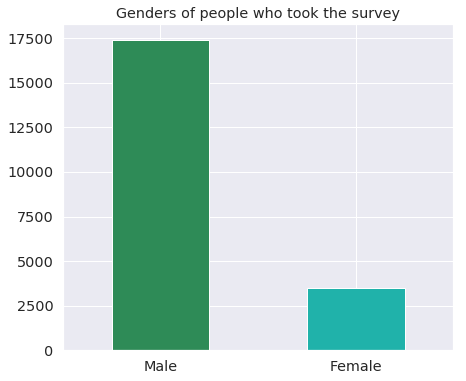

In [25]:
sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

plt.rcParams.update(params)

plt.figure(figsize=(7,6))


df2['q3Gender'].value_counts().plot.bar(color=['#2E8B57', '#20B2AA'])
plt.title("Genders of people who took the survey")
plt.xticks(rotation='horizontal')
plt.show()


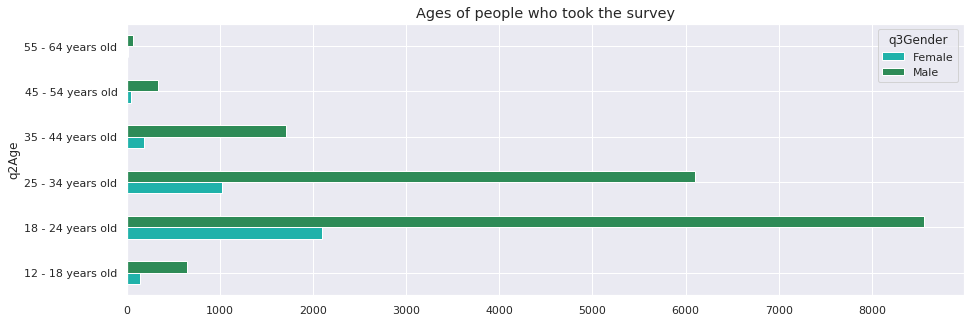

In [26]:
sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
          'figure.figsize': (8, 7),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

pd.crosstab(index=df2.q2Age, columns=df2.q3Gender).plot.barh(color=['#20B2AA', '#2E8B57'])
plt.rcParams.update(params)

plt.title("Ages of people who took the survey")
plt.show()

# Age started to code
## Perc over each age group

In [27]:

pd.crosstab(index=df2.q1AgeBeginCoding, columns=df2.q3Gender, normalize='index').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False)


q3Gender            Female   Male
q1AgeBeginCoding                 
50+ years or older   60.00  40.00
41 - 50 years old    38.46  61.54
31 - 35 years old    27.49  72.51
36 - 40 years old    25.93  74.07
26 - 30 years old    19.85  80.15
16 - 20 years old    18.76  81.24
21 - 25 years old    16.79  83.21
11 - 15 years old    11.06  88.94
5 - 10 years old      7.59  92.41

## Percentage over genders

In [28]:
pd.crosstab(index=df2.q1AgeBeginCoding, columns=df2.q3Gender, normalize='columns').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False)


q3Gender            Female   Male
q1AgeBeginCoding                 
16 - 20 years old    65.21  56.58
21 - 25 years old    14.73  14.63
11 - 15 years old    13.44  21.67
26 - 30 years old     3.01   2.43
5 - 10 years old      1.49   3.64
31 - 35 years old     1.35   0.71
36 - 40 years old     0.40   0.23
41 - 50 years old     0.29   0.09
50+ years or older    0.09   0.01

In [29]:


## make doube-sided violin plot  for younger ages !!!!!



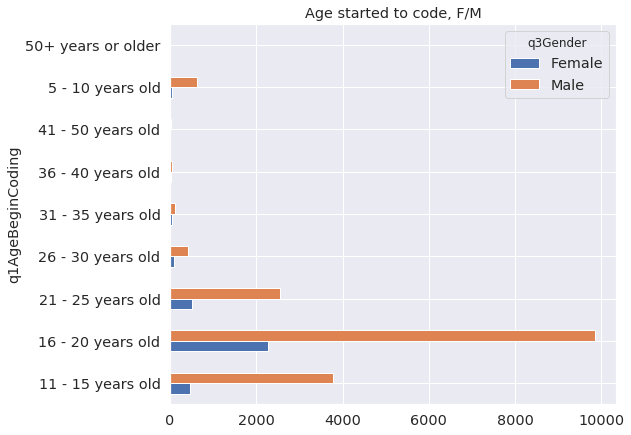

In [30]:
pd.crosstab(index=df2.q1AgeBeginCoding, columns=df2.q3Gender).plot.barh()
plt.title('Age started to code, F/M')
plt.show()

# only professionnals

In [31]:
dfprof = df2[((df2['q8Student']=='Students')==False)]
dfprof = dfprof[((dfprof['q9CurrentRole']=='no_answer')==False)]
dfprof = dfprof[((dfprof['q9CurrentRole']=='Unemployed')==False)]
dfprof.q9CurrentRole.value_counts()

Software Engineer                  3365
Full-stack Developer               2626
Back-end Developer                 1454
Front-end Developer                 666
Web Developer                       575
Mobile Developer                    521
Software Architect                  507
Software Test Engineer              356
Data Scientist                      283
Data Analyst                        231
Development Operations Engineer     191
Data Engineer                       166
Software Specialist                 114
Platform Engineer                   103
Network Administrator                62
Reliability Engineer                 58
Database Administrator               44
Name: q9CurrentRole, dtype: int64

## Occupation, % over each role

In [32]:
pd.crosstab(index=dfprof.q9CurrentRole, columns=dfprof.q3Gender, normalize='index').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=True)

q3Gender                         Female   Male
q9CurrentRole                                 
Software Architect                 3.94  96.06
Network Administrator              4.84  95.16
Platform Engineer                  6.80  93.20
Database Administrator             6.82  93.18
Reliability Engineer               6.90  93.10
Development Operations Engineer    7.33  92.67
Software Specialist                8.77  91.23
Data Engineer                     10.24  89.76
Full-stack Developer              10.93  89.07
Back-end Developer                12.59  87.41
Mobile Developer                  12.67  87.33
Software Engineer                 13.46  86.54
Data Scientist                    16.61  83.39
Data Analyst                      17.32  82.68
Front-end Developer               18.17  81.83
Web Developer                     22.61  77.39
Software Test Engineer            23.31  76.69

Text(0.5, 1.0, 'Job occupation by gender %')

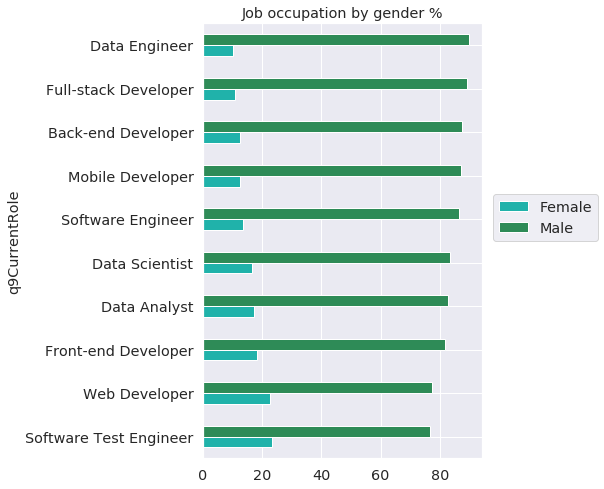

In [33]:
sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
          'figure.figsize': (5, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

pd.crosstab(index=dfprof.q9CurrentRole, columns=dfprof.q3Gender, normalize='index').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False).head(10).plot.barh(color=['#20B2AA', '#2E8B57'])
plt.legend(loc=(1.04,0.5))

plt.title('Job occupation by gender %')

## Occupation, % over each gender

In [34]:
pd.crosstab(index=dfprof.q9CurrentRole, columns=dfprof.q3Gender, normalize='columns').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False)

q3Gender                         Female   Male
q9CurrentRole                                 
Software Engineer                 30.44  29.61
Full-stack Developer              19.29  23.78
Back-end Developer                12.30  12.92
Web Developer                      8.74   4.53
Front-end Developer                8.13   5.54
Software Test Engineer             5.58   2.78
Mobile Developer                   4.44   4.63
Data Scientist                     3.16   2.40
Data Analyst                       2.69   1.94
Software Architect                 1.34   4.95
Data Engineer                      1.14   1.52
Development Operations Engineer    0.94   1.80
Software Specialist                0.67   1.06
Platform Engineer                  0.47   0.98
Reliability Engineer               0.27   0.55
Database Administrator             0.20   0.42
Network Administrator              0.20   0.60

# Students 

In [35]:
dfstu = df2[((df2['q8Student']=='Students')==True)]
dfstu.head()

RespondentID CountryNumeric2   q1AgeBeginCoding              q2Age  \
0    6464453728     South Korea  16 - 20 years old  18 - 24 years old   
2    6464392829        Malaysia  11 - 15 years old  12 - 18 years old   
3    6481629912         Curaçao  11 - 15 years old  12 - 18 years old   
8    6477950548     Switzerland  16 - 20 years old  18 - 24 years old   
9    6477542461          Israel  16 - 20 years old  18 - 24 years old   

  q3Gender                          q4Education  \
0   Female                         Some college   
2   Female                         Some college   
3     Male                     College graduate   
8     Male  Post graduate degree (Masters, PhD)   
9     Male                 High school graduate   

                                       q5DegreeFocus        q6LearnCodeUni  \
0                                   Computer Science  School or university   
2  Other STEM (science, technology, engineering, ...  School or university   
3                                   Computer Science             no_answer   
8  Other STEM (science, technology, engineering, ...             no_answer   
9                                   Computer Science             no_answer   

              q6LearnCodeSelfTaught                 q6LearnCodeAccelTrain  \
0  Self-taught (i.e. books, online)                             no_answer   
2                         no_answer  Accelerated training (i.e. bootcamp)   
3  Self-taught (i.e. books, online)                             no_answer   
8  Self-taught (i.e. books, online)                             no_answer   
9  Self-taught (i.e. books, online)                             no_answer   

   ... q26FrameLearnReactNative q26FrameLearnRubyMotion  \
0  ...               Will Learn              Will Learn   
2  ...               Will Learn              Will Learn   
3  ...                no_answer               no_answer   
8  ...                no_answer               no_answer   
9  ...                no_answer               no_answer   

               q27EmergingTechSkill q30LearnCodeStackOverflow  \
0                         no_answer            Stack Overflow   
2                          Robotics                 no_answer   
3                          Robotics            Stack Overflow   
8  Machine Learning / Deep Learning            Stack Overflow   
9                Internet of Things            Stack Overflow   

  q30LearnCodeYoutube q30LearnCodeMOOC q30LearnCodeCompCodingSites  \
0             YouTube        no_answer                   no_answer   
2             YouTube        no_answer                   no_answer   
3           no_answer        no_answer                   no_answer   
8           no_answer        no_answer                   no_answer   
9             YouTube        no_answer                   no_answer   

  q30LearnCodeOnlineTutorial q30LearnCodeBooks q30LearnCodeAcademicPaper  
0                  no_answer         no_answer                 no_answer  
2                  no_answer         no_answer           Academic papers  
3                  no_answer         no_answer                 no_answer  
8                  no_answer             Books           Academic papers  
9                  no_answer             Books                 no_answer  

[5 rows x 132 columns]

## Degree focus, % over each degrees, pros and students

In [36]:
pd.crosstab(index=df2.q5DegreeFocus, columns=df2.q3Gender, normalize='index').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False)


q3Gender                                            Female   Male
q5DegreeFocus                                                    
other                                                21.61  78.39
Other STEM (science, technology, engineering, m...   16.92  83.08
Computer Science                                     16.30  83.70

## Degree focus, % over each degrees, students today

Text(0.5, 1.0, 'Degree focus')

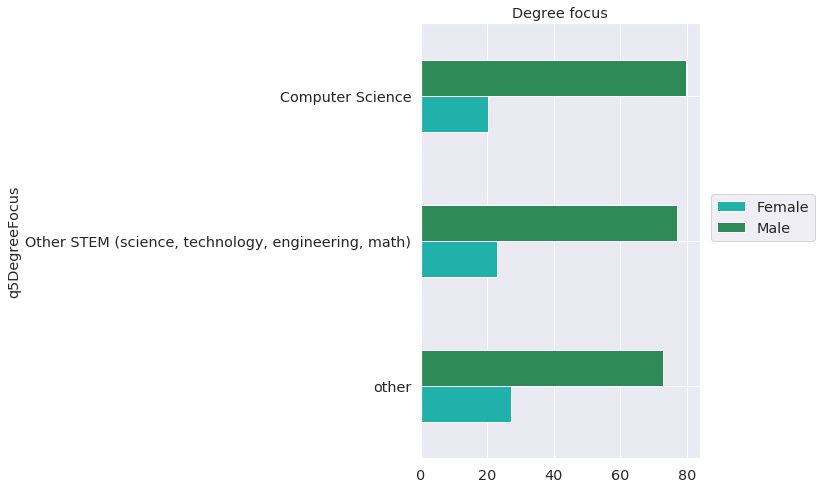

In [37]:


sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
          'figure.figsize': (5, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

pd.crosstab(index=dfstu.q5DegreeFocus, columns=dfstu.q3Gender, normalize='index').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False).plot.barh(color=['#20B2AA', '#2E8B57'])
plt.legend(loc=(1.04,0.5))

plt.title('Degree focus')

## Degree focus, % over each gender, pros and students

In [38]:
pd.crosstab(index=df2.q5DegreeFocus, columns=df2.q3Gender, normalize='columns').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False)

q3Gender                                            Female   Male
q5DegreeFocus                                                    
Computer Science                                     70.69  72.73
Other STEM (science, technology, engineering, m...   23.15  22.79
other                                                 6.16   4.48

## Degree focus, % over each gender, students today

In [39]:
pd.crosstab(index=dfstu.q5DegreeFocus, columns=dfstu.q3Gender, normalize='columns').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False)

q3Gender                                            Female   Male
q5DegreeFocus                                                    
Computer Science                                     75.29  78.77
Other STEM (science, technology, engineering, m...   20.90  18.55
other                                                 3.81   2.69

# Job level

In [40]:
dfprof.q8JobLevel.value_counts()

Senior developer                4750
Level 1 developer (junior)      3648
New grad                         599
Principal engineer               510
no_answer                        505
Architect                        375
Freelancer                       332
Engineering manager              307
Founder / CEO / CTO              211
Director / VP of Engineering      85
Name: q8JobLevel, dtype: int64

In [41]:
pd.crosstab(index=dfprof.q8JobLevel, columns=dfprof.q3Gender, normalize='columns').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False)

q3Gender                      Female   Male
q8JobLevel                                 
Level 1 developer (junior)     46.10  30.12
Senior developer               30.24  43.73
New grad                        8.06   4.87
no_answer                       7.06   4.07
Principal engineer              2.35   4.83
Engineering manager             2.02   2.82
Freelancer                      1.55   3.14
Founder / CEO / CTO             1.28   1.95
Architect                       0.94   3.67
Director / VP of Engineering    0.40   0.80

In [42]:
pd.crosstab(index=dfprof.q8JobLevel, columns=dfprof.q3Gender, normalize='columns').apply(lambda x: round(x*100,2)).sort_values(by=['Female'], ascending=False)

q3Gender                      Female   Male
q8JobLevel                                 
Level 1 developer (junior)     46.10  30.12
Senior developer               30.24  43.73
New grad                        8.06   4.87
no_answer                       7.06   4.07
Principal engineer              2.35   4.83
Engineering manager             2.02   2.82
Freelancer                      1.55   3.14
Founder / CEO / CTO             1.28   1.95
Architect                       0.94   3.67
Director / VP of Engineering    0.40   0.80

# Comparing job levels by gender and age group

In [43]:

pd.crosstab(index=dfprof.q8JobLevel, columns=[dfprof.q2Age,dfprof.q3Gender],normalize='index').apply(lambda x: round(x*100,2))

q2Age                        12 - 18 years old       18 - 24 years old         \
q3Gender                                Female  Male            Female   Male   
q8JobLevel                                                                      
Architect                                 0.00  0.00              0.27   2.67   
Director / VP of Engineering              0.00  0.00              1.18   3.53   
Engineering manager                       0.33  0.98              2.61   7.17   
Founder / CEO / CTO                       1.42  3.79              5.21  22.75   
Freelancer                                0.00  4.22              2.11  30.42   
Level 1 developer (junior)                0.03  0.33              9.54  44.35   
New grad                                  0.00  0.33             14.36  57.26   
Principal engineer                        0.00  0.00              0.78   2.75   
Senior developer                          0.02  0.02              0.74   7.73   
no_answer                                 0.00  0.40              5.15  18.81   

q2Age                        25 - 34 years old        35 - 44 years old  \
q3Gender                                Female   Male            Female   
q8JobLevel                                                                
Architect                                 2.67  42.13              0.80   
Director / VP of Engineering              3.53  32.94              1.18   
Engineering manager                       4.23  35.18              2.28   
Founder / CEO / CTO                       0.95  41.71              0.95   
Freelancer                                3.01  40.06              1.51   
Level 1 developer (junior)                8.36  33.66              0.63   
New grad                                  5.34  21.20              0.33   
Principal engineer                        3.14  45.49              2.75   
Senior developer                          6.84  62.46              1.47   
no_answer                                11.88  48.51              2.77   

q2Age                               45 - 54 years old         \
q3Gender                       Male            Female   Male   
q8JobLevel                                                     
Architect                     41.33              0.00   9.07   
Director / VP of Engineering  36.47              1.18  15.29   
Engineering manager           37.13              0.33   8.47   
Founder / CEO / CTO           16.59              0.47   5.69   
Freelancer                    13.55              0.30   3.92   
Level 1 developer (junior)     2.69              0.22   0.16   
New grad                       1.00              0.00   0.17   
Principal engineer            35.49              0.00   8.24   
Senior developer              16.84              0.29   2.91   
no_answer                      8.32              0.40   2.18   

q2Age                        55 - 64 years old        
q3Gender                                Female  Male  
q8JobLevel                                            
Architect                                 0.00  1.07  
Director / VP of Engineering              0.00  4.71  
Engineering manager                       0.00  1.30  
Founder / CEO / CTO                       0.00  0.47  
Freelancer                                0.00  0.90  
Level 1 developer (junior)                0.03  0.00  
New grad                                  0.00  0.00  
Principal engineer                        0.20  1.18  
Senior developer                          0.11  0.57  
no_answer                                 0.59  0.99

# Comparing senior and junior developpers
# over genders and ages

In [44]:
seniorjunior = dfprof[dfprof.q8JobLevel.isin(['Senior developer','Level 1 developer (junior)'])]

In [45]:
pd.crosstab(index=seniorjunior.q8JobLevel, columns=[seniorjunior.q2Age,seniorjunior.q3Gender],normalize='columns').apply(lambda x: round(x*100,2))

q2Age                      12 - 18 years old        18 - 24 years old         \
q3Gender                              Female   Male            Female   Male   
q8JobLevel                                                                     
Level 1 developer (junior)              50.0  92.31             90.86  81.51   
Senior developer                        50.0   7.69              9.14  18.49   

q2Age                      25 - 34 years old        35 - 44 years old         \
q3Gender                              Female   Male            Female   Male   
q8JobLevel                                                                     
Level 1 developer (junior)             48.41  29.27             24.73  10.91   
Senior developer                       51.59  70.73             75.27  89.09   

q2Age                      45 - 54 years old        55 - 64 years old         
q3Gender                              Female   Male            Female   Male  
q8JobLevel                                                                    
Level 1 developer (junior)             36.36   4.17             16.67    0.0  
Senior developer                       63.64  95.83             83.33  100.0

In [46]:
pd.crosstab(index=seniorjunior.q8JobLevel, columns=[seniorjunior.q2Age,seniorjunior.q3Gender],normalize='index').apply(lambda x: round(x*100,2))

q2Age                      12 - 18 years old       18 - 24 years old         \
q3Gender                              Female  Male            Female   Male   
q8JobLevel                                                                    
Level 1 developer (junior)              0.03  0.33              9.54  44.35   
Senior developer                        0.02  0.02              0.74   7.73   

q2Age                      25 - 34 years old        35 - 44 years old         \
q3Gender                              Female   Male            Female   Male   
q8JobLevel                                                                     
Level 1 developer (junior)              8.36  33.66              0.63   2.69   
Senior developer                        6.84  62.46              1.47  16.84   

q2Age                      45 - 54 years old       55 - 64 years old        
q3Gender                              Female  Male            Female  Male  
q8JobLevel                                                                  
Level 1 developer (junior)              0.22  0.16              0.03  0.00  
Senior developer                        0.29  2.91              0.11  0.57

# Correlations

Text(0.5, 1.0, 'Gender / age begin coding heatmap')

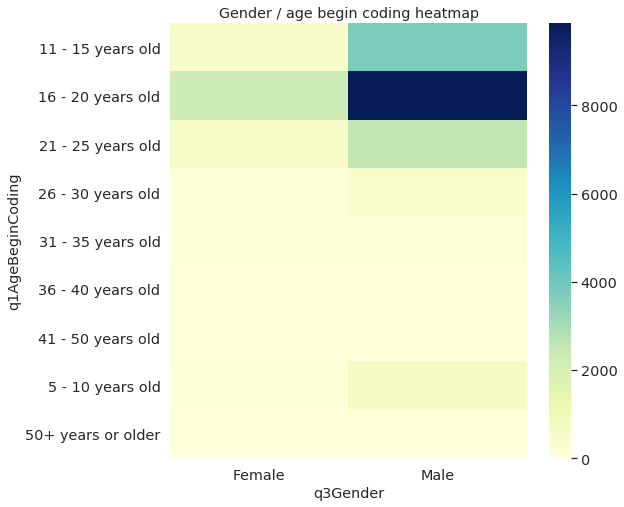

In [47]:
sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
corr1 = pd.crosstab(index=df2.q1AgeBeginCoding, columns=df2.q3Gender)
sns.heatmap(corr1, cmap="YlGnBu")
plt.title('Gender / age begin coding heatmap')

Text(0.5, 1.0, 'Age begin coding / degree focus heatmap')

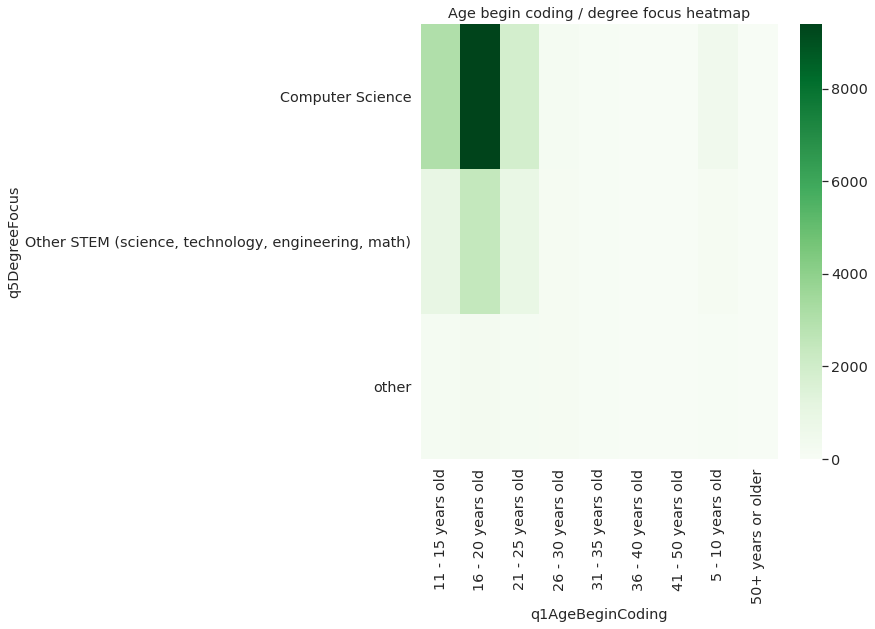

In [48]:
sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
corr2 = pd.crosstab(index=df2.q5DegreeFocus, columns=df2.q1AgeBeginCoding)

sns.heatmap(corr2, cmap="Greens")
plt.title('Age begin coding / degree focus heatmap')

# Polar Plot

In [49]:
dfjobcrit = df2[['q3Gender','q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth']]

In [50]:
jobcriteria = ['q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth']

In [51]:
# df_tree_floats['genderfloat']=[0.0 if i=='Female' else 1.0 for i in df_tree_floats.q3Gender]

for c in jobcriteria:
    dfjobcrit[c]=[0.0 if i=='no_answer' else 1.0 for i in dfjobcrit[c]]


In [52]:
dfjobcrit.shape

(20903, 14)

In [53]:
dfjobcrit =dfjobcrit.groupby(dfjobcrit['q3Gender']).agg('sum').T

In [54]:
totalwomen = df2.q3Gender[df2.q3Gender=='Female'].count()
totalmen = df2.q3Gender[df2.q3Gender=='Male'].count()

In [55]:
dfjobcrit

q3Gender                       Female    Male
q12JobCritPrefTechStack         564.0  4116.0
q12JobCritCompMission           566.0  2885.0
q12JobCritCompCulture          1309.0  6207.0
q12JobCritWorkLifeBal          1958.0  9477.0
q12JobCritCompensation          881.0  6128.0
q12JobCritProximity             366.0  1961.0
q12JobCritPerks                 319.0  1735.0
q12JobCritSmartPeopleTeam      1367.0  7774.0
q12JobCritImpactwithProduct     524.0  2865.0
q12JobCritInterestProblems     1602.0  7692.0
q12JobCritFundingandValuation   154.0   928.0
q12JobCritStability             327.0  1558.0
q12JobCritProfGrowth           2235.0  9651.0

In [56]:
dfjobcrit['Female']=dfjobcrit['Female'].apply(lambda x: round((x/totalwomen),2)*100)

In [57]:
dfjobcrit['Male']=dfjobcrit['Male'].apply(lambda x: round((x/totalmen),2)*100)

In [58]:
dfjobcrit

q3Gender                       Female  Male
q12JobCritPrefTechStack          16.0  24.0
q12JobCritCompMission            16.0  17.0
q12JobCritCompCulture            38.0  36.0
q12JobCritWorkLifeBal            56.0  54.0
q12JobCritCompensation           25.0  35.0
q12JobCritProximity              10.0  11.0
q12JobCritPerks                   9.0  10.0
q12JobCritSmartPeopleTeam        39.0  45.0
q12JobCritImpactwithProduct      15.0  16.0
q12JobCritInterestProblems       46.0  44.0
q12JobCritFundingandValuation     4.0   5.0
q12JobCritStability               9.0   9.0
q12JobCritProfGrowth             64.0  55.0

In [59]:
dfjobcrit=dfjobcrit.drop(dfjobcrit.index[dfjobcrit['Female'] <= 15].tolist())
dfjobcrit

q3Gender                    Female  Male
q12JobCritPrefTechStack       16.0  24.0
q12JobCritCompMission         16.0  17.0
q12JobCritCompCulture         38.0  36.0
q12JobCritWorkLifeBal         56.0  54.0
q12JobCritCompensation        25.0  35.0
q12JobCritSmartPeopleTeam     39.0  45.0
q12JobCritInterestProblems    46.0  44.0
q12JobCritProfGrowth          64.0  55.0

In [60]:
newnames=['pref_tech_stack','company_mission','company_culture','work_life_balance','compensation','smart_collegues','interesting_problems','professional_growth']

In [61]:
dfjobcrit = dfjobcrit.T

In [62]:
dfjobcrit.columns=newnames

In [63]:
dfjobcrit = dfjobcrit.T
dfjobcrit

q3Gender              Female  Male
pref_tech_stack         16.0  24.0
company_mission         16.0  17.0
company_culture         38.0  36.0
work_life_balance       56.0  54.0
compensation            25.0  35.0
smart_collegues         39.0  45.0
interesting_problems    46.0  44.0
professional_growth     64.0  55.0

In [64]:
dfjobcrit

q3Gender              Female  Male
pref_tech_stack         16.0  24.0
company_mission         16.0  17.0
company_culture         38.0  36.0
work_life_balance       56.0  54.0
compensation            25.0  35.0
smart_collegues         39.0  45.0
interesting_problems    46.0  44.0
professional_growth     64.0  55.0

In [65]:
#### POLAAAAAAR

angles=np.linspace(0, 2*np.pi, len(newnames), endpoint=False)

In [66]:
women_crits=dfjobcrit.iloc[:,0].values
men_crits=dfjobcrit.iloc[:,1].values

In [67]:
women_crits=np.concatenate((women_crits,[women_crits[0]]))
angles=np.concatenate((angles,[angles[0]]))

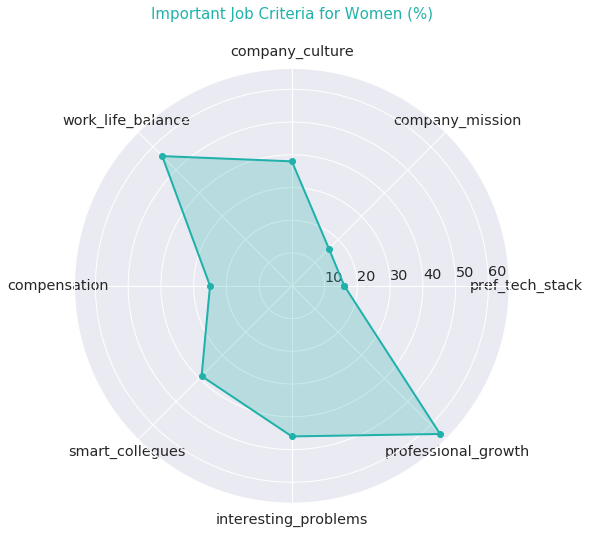

In [68]:
fig=plt.figure()

ax = fig.add_subplot(111, polar=True)
ax.set_rlabel_position(2)
ax.plot(angles, women_crits, 'o-', linewidth=2, color = '#20B2AA')
ax.fill(angles, women_crits, alpha=0.25,color = '#20B2AA')
ax.set_thetagrids(angles * 180/np.pi, newnames)
title='Important Job Criteria for Women (%)'
plt.title(title, size=15, color='#20B2AA', y=1.1)

ax.grid(True)

In [69]:
men_crits=np.concatenate((men_crits,[men_crits[0]]))

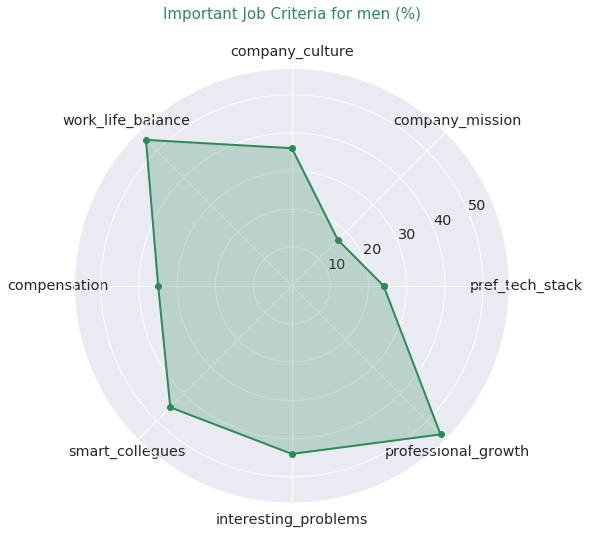

In [70]:
fig=plt.figure()
ax.set_rlabel_position(2)
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, men_crits, 'o-', linewidth=2, color='#2E8B57')
ax.fill(angles, men_crits, alpha=0.25,color='#2E8B57')
ax.set_thetagrids(angles * 180/np.pi, newnames)
title='Important Job Criteria for men (%)'
plt.title(title, size=15, color='#2E8B57', y=1.1)

ax.grid(True)

# Starting to model

I want to explicit the links between : age learning to code, current age, (how long you've been coding), studies, occupation, country (probably)

Next steps
create a column with "how long you've been coding", approximately
decision tree : output is occupation, input is all the above
same with studies

In [71]:
agedict={'18 - 24 years old':21.0, '25 - 34 years old':29.5,'35 - 44 years old':39.5,'12 - 18 years old':15,'45 - 54 years old':49.5,'55 - 64 years old':59.5 }

In [72]:
begindict= {'5 - 10 years old':7.5, '11 - 15 years old':13, '16 - 20 years old':18,'21 - 25 years old':23,'26 - 30 years old':28,'31 - 35 years old':33, '36 - 40 years old':38,'41 - 50 years old':44.5,'50+ years or older':62 }

In [73]:
df3=df2.copy()

In [74]:
# Replacing current age and age begin to code by the means of the intervals.

df3.q2Age = df3['q2Age'].replace(agedict)
df3.q1AgeBeginCoding = df3['q1AgeBeginCoding'].replace(begindict)

df3.head()

RespondentID CountryNumeric2  q1AgeBeginCoding  q2Age q3Gender  \
0    6464453728     South Korea              18.0   21.0   Female   
1    6478031510         Ukraine              18.0   29.5     Male   
2    6464392829        Malaysia              13.0   15.0   Female   
3    6481629912         Curaçao              13.0   15.0     Male   
5    6463843138   United States              44.5   39.5     Male   

                           q4Education  \
0                         Some college   
1  Post graduate degree (Masters, PhD)   
2                         Some college   
3                     College graduate   
5                     College graduate   

                                       q5DegreeFocus        q6LearnCodeUni  \
0                                   Computer Science  School or university   
1  Other STEM (science, technology, engineering, ...  School or university   
2  Other STEM (science, technology, engineering, ...  School or university   
3                                   Computer Science             no_answer   
5                                   Computer Science  School or university   

              q6LearnCodeSelfTaught                 q6LearnCodeAccelTrain  \
0  Self-taught (i.e. books, online)                             no_answer   
1  Self-taught (i.e. books, online)                             no_answer   
2                         no_answer  Accelerated training (i.e. bootcamp)   
3  Self-taught (i.e. books, online)                             no_answer   
5                         no_answer                             no_answer   

   ... q26FrameLearnReactNative q26FrameLearnRubyMotion  \
0  ...               Will Learn              Will Learn   
1  ...                no_answer               no_answer   
2  ...               Will Learn              Will Learn   
3  ...                no_answer               no_answer   
5  ...               Will Learn              Will Learn   

               q27EmergingTechSkill q30LearnCodeStackOverflow  \
0                         no_answer            Stack Overflow   
1  Machine Learning / Deep Learning            Stack Overflow   
2                          Robotics                 no_answer   
3                          Robotics            Stack Overflow   
5                Internet of Things                 no_answer   

  q30LearnCodeYoutube                                 q30LearnCodeMOOC  \
0             YouTube                                        no_answer   
1             YouTube  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   
2             YouTube                                        no_answer   
3           no_answer                                        no_answer   
5             YouTube  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   

  q30LearnCodeCompCodingSites q30LearnCodeOnlineTutorial q30LearnCodeBooks  \
0                   no_answer                  no_answer         no_answer   
1                   no_answer                  no_answer             Books   
2                   no_answer                  no_answer         no_answer   
3                   no_answer                  no_answer         no_answer   
5                   no_answer                  no_answer             Books   

  q30LearnCodeAcademicPaper  
0                 no_answer  
1                 no_answer  
2           Academic papers  
3                 no_answer  
5                 no_answer  

[5 rows x 132 columns]

In [75]:
df3 = df3.assign(yearscoding=df3.q2Age-df3.q1AgeBeginCoding)
df3.head()


RespondentID CountryNumeric2  q1AgeBeginCoding  q2Age q3Gender  \
0    6464453728     South Korea              18.0   21.0   Female   
1    6478031510         Ukraine              18.0   29.5     Male   
2    6464392829        Malaysia              13.0   15.0   Female   
3    6481629912         Curaçao              13.0   15.0     Male   
5    6463843138   United States              44.5   39.5     Male   

                           q4Education  \
0                         Some college   
1  Post graduate degree (Masters, PhD)   
2                         Some college   
3                     College graduate   
5                     College graduate   

                                       q5DegreeFocus        q6LearnCodeUni  \
0                                   Computer Science  School or university   
1  Other STEM (science, technology, engineering, ...  School or university   
2  Other STEM (science, technology, engineering, ...  School or university   
3                                   Computer Science             no_answer   
5                                   Computer Science  School or university   

              q6LearnCodeSelfTaught                 q6LearnCodeAccelTrain  \
0  Self-taught (i.e. books, online)                             no_answer   
1  Self-taught (i.e. books, online)                             no_answer   
2                         no_answer  Accelerated training (i.e. bootcamp)   
3  Self-taught (i.e. books, online)                             no_answer   
5                         no_answer                             no_answer   

   ... q26FrameLearnRubyMotion              q27EmergingTechSkill  \
0  ...              Will Learn                         no_answer   
1  ...               no_answer  Machine Learning / Deep Learning   
2  ...              Will Learn                          Robotics   
3  ...               no_answer                          Robotics   
5  ...              Will Learn                Internet of Things   

  q30LearnCodeStackOverflow q30LearnCodeYoutube  \
0            Stack Overflow             YouTube   
1            Stack Overflow             YouTube   
2                 no_answer             YouTube   
3            Stack Overflow           no_answer   
5                 no_answer             YouTube   

                                  q30LearnCodeMOOC  \
0                                        no_answer   
1  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   
2                                        no_answer   
3                                        no_answer   
5  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   

  q30LearnCodeCompCodingSites q30LearnCodeOnlineTutorial q30LearnCodeBooks  \
0                   no_answer                  no_answer         no_answer   
1                   no_answer                  no_answer             Books   
2                   no_answer                  no_answer         no_answer   
3                   no_answer                  no_answer         no_answer   
5                   no_answer                  no_answer             Books   

  q30LearnCodeAcademicPaper yearscoding  
0                 no_answer         3.0  
1                 no_answer        11.5  
2           Academic papers         2.0  
3                 no_answer         2.0  
5                 no_answer        -5.0  

[5 rows x 133 columns]

In [76]:
df3.yearscoding[df3['yearscoding']<0].value_counts()

# Some mistakes in the approximations, because age intervals for 'begin coding' and 'current age'
# do not overlap perfectly.

# If the return age is <= 3.5, I will replace it with 2 (mean of possible lengths in years)
# if it's <3.5, i will drop the rows, as it's probably a mistake (swapping begincode and current age for instance)



-2.0     855
-3.0     324
-3.5      69
-5.0       8
-2.5       4
-17.0      3
-23.0      1
-8.0       1
-12.0      1
-18.0      1
-12.5      1
Name: yearscoding, dtype: int64

In [77]:
df3 = df3[df3['yearscoding']>=-3.5]
df3.yearscoding = df3.yearscoding.replace([-2.0,-3.0,-3.5,-2.5],2)

In [78]:
df3.head()

RespondentID CountryNumeric2  q1AgeBeginCoding  q2Age q3Gender  \
0    6464453728     South Korea              18.0   21.0   Female   
1    6478031510         Ukraine              18.0   29.5     Male   
2    6464392829        Malaysia              13.0   15.0   Female   
3    6481629912         Curaçao              13.0   15.0     Male   
6    6458326054   United States              18.0   49.5     Male   

                           q4Education  \
0                         Some college   
1  Post graduate degree (Masters, PhD)   
2                         Some college   
3                     College graduate   
6  Post graduate degree (Masters, PhD)   

                                       q5DegreeFocus        q6LearnCodeUni  \
0                                   Computer Science  School or university   
1  Other STEM (science, technology, engineering, ...  School or university   
2  Other STEM (science, technology, engineering, ...  School or university   
3                                   Computer Science             no_answer   
6                                   Computer Science             no_answer   

              q6LearnCodeSelfTaught                 q6LearnCodeAccelTrain  \
0  Self-taught (i.e. books, online)                             no_answer   
1  Self-taught (i.e. books, online)                             no_answer   
2                         no_answer  Accelerated training (i.e. bootcamp)   
3  Self-taught (i.e. books, online)                             no_answer   
6  Self-taught (i.e. books, online)                             no_answer   

   ... q26FrameLearnRubyMotion              q27EmergingTechSkill  \
0  ...              Will Learn                         no_answer   
1  ...               no_answer  Machine Learning / Deep Learning   
2  ...              Will Learn                          Robotics   
3  ...               no_answer                          Robotics   
6  ...               no_answer                 Quantum Computing   

  q30LearnCodeStackOverflow q30LearnCodeYoutube  \
0            Stack Overflow             YouTube   
1            Stack Overflow             YouTube   
2                 no_answer             YouTube   
3            Stack Overflow           no_answer   
6            Stack Overflow           no_answer   

                                  q30LearnCodeMOOC  \
0                                        no_answer   
1  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   
2                                        no_answer   
3                                        no_answer   
6                                        no_answer   

  q30LearnCodeCompCodingSites q30LearnCodeOnlineTutorial q30LearnCodeBooks  \
0                   no_answer                  no_answer         no_answer   
1                   no_answer                  no_answer             Books   
2                   no_answer                  no_answer         no_answer   
3                   no_answer                  no_answer         no_answer   
6                   no_answer                  no_answer             Books   

  q30LearnCodeAcademicPaper yearscoding  
0                 no_answer         3.0  
1                 no_answer        11.5  
2           Academic papers         2.0  
3                 no_answer         2.0  
6                 no_answer        31.5  

[5 rows x 133 columns]

In [79]:
df3['justforfun']=""


Text(0.5, 1.0, 'Ages by gender')

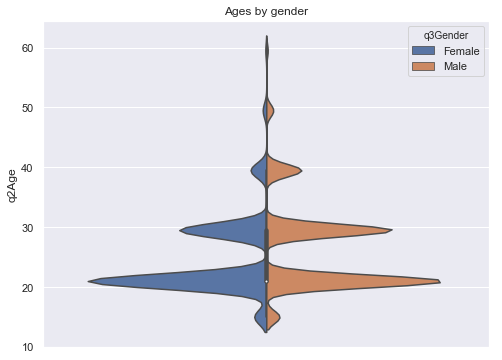

In [80]:
sns.set()
plt.figure(figsize=(8,6))
g=sns.violinplot(y="q2Age", x='justforfun',hue='q3Gender',split=True, data=df3)
g.set_xlabel("")
plt.title("Ages by gender")
#not as explicit as I hoped

Text(0.5, 1.0, 'Years of coding experience by gender')

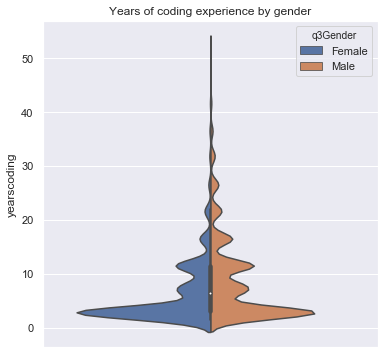

In [81]:
sns.set()
plt.figure(figsize=(6,6))
g=sns.violinplot(y="yearscoding", x='justforfun',hue='q3Gender',split=True, data=df3)
g.set_xlabel("")
plt.title('Years of coding experience by gender')

#not as explicit as I hoped

In [82]:
dfviolin = df3.copy()

In [83]:
dfviolin=dfviolin[dfviolin['q1AgeBeginCoding']<44.5]

Text(0.5, 1.0, 'Age begin to code by gender')

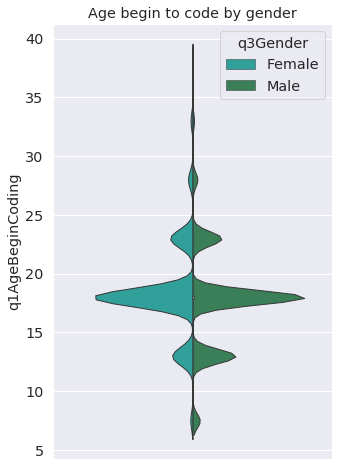

In [84]:
sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
          'figure.figsize': (5, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
my_pal = {"Female": "#20B2AA", "Male": "#2E8B57"}
g=sns.violinplot(y="q1AgeBeginCoding", x='justforfun',hue='q3Gender',split=True, data=dfviolin,linewidth=1,palette=my_pal)
g.set_xlabel("")
plt.title('Age begin to code by gender')


In [85]:
df3.columns.tolist()

['RespondentID',
 'CountryNumeric2',
 'q1AgeBeginCoding',
 'q2Age',
 'q3Gender',
 'q4Education',
 'q5DegreeFocus',
 'q6LearnCodeUni',
 'q6LearnCodeSelfTaught',
 'q6LearnCodeAccelTrain',
 'q8JobLevel',
 'q8Student',
 'q9CurrentRole',
 'q10Industry',
 'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth',
 'q13EmpMeasWhiteboard',
 'q13EmpMeasTechPhoneInt',
 'q13EmpMeasTakeHomeProject',
 'q13EmpMeasResume',
 'q13EmpMeasPastWork',
 'q16HiringManager',
 'q17HirChaInterviews',
 'q17HirChaHardAssessSkills',
 'q17HirChaNotEnoughTalent',
 'q17HirChaNoDiversCandidates',
 'q17HirChaCompfromCompanies',
 'q17HirChaJobDescript',
 'q18NumDevelopHireWithinNextYear',
 'q20CandYearExp',
 'q20CandCompScienceDegre

In [86]:
# Decision tree :
treecols = ['CountryNumeric2','q1AgeBeginCoding','q2Age','q3Gender','q4Education','q5DegreeFocus','q6LearnCodeUni','q6LearnCodeSelfTaught','q6LearnCodeAccelTrain','q8JobLevel','q8Student','q9CurrentRole','q10Industry','yearscoding']

In [87]:
df_tree = df3[treecols]
df_tree.head()

CountryNumeric2  q1AgeBeginCoding  q2Age q3Gender  \
0     South Korea              18.0   21.0   Female   
1         Ukraine              18.0   29.5     Male   
2        Malaysia              13.0   15.0   Female   
3         Curaçao              13.0   15.0     Male   
6   United States              18.0   49.5     Male   

                           q4Education  \
0                         Some college   
1  Post graduate degree (Masters, PhD)   
2                         Some college   
3                     College graduate   
6  Post graduate degree (Masters, PhD)   

                                       q5DegreeFocus        q6LearnCodeUni  \
0                                   Computer Science  School or university   
1  Other STEM (science, technology, engineering, ...  School or university   
2  Other STEM (science, technology, engineering, ...  School or university   
3                                   Computer Science             no_answer   
6                                   Computer Science             no_answer   

              q6LearnCodeSelfTaught                 q6LearnCodeAccelTrain  \
0  Self-taught (i.e. books, online)                             no_answer   
1  Self-taught (i.e. books, online)                             no_answer   
2                         no_answer  Accelerated training (i.e. bootcamp)   
3  Self-taught (i.e. books, online)                             no_answer   
6  Self-taught (i.e. books, online)                             no_answer   

                     q8JobLevel  q8Student           q9CurrentRole  \
0                       Student   Students                 Student   
1                     no_answer  no_answer  Software Test Engineer   
2                       Student   Students                 Student   
3                       Student   Students                 Student   
6  Director / VP of Engineering  no_answer              Unemployed   

          q10Industry  yearscoding  
0           no_answer          3.0  
1  Financial Services         11.5  
2           Education          2.0  
3           no_answer          2.0  
6  Financial Services         31.5

In [88]:
df_tree.q5DegreeFocus.value_counts()

Computer Science                                       15125
Other STEM (science, technology, engineering, math)     4771
other                                                    991
Name: q5DegreeFocus, dtype: int64

In [89]:
df_tree.shape

(20887, 14)

In [90]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [91]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [92]:
df_tree_floats = df_tree.copy()

In [93]:
df_tree_floats['genderfloat']=[0.0 if i=='Female' else 1.0 for i in df_tree_floats.q3Gender]

In [94]:
feature_cols = ['genderfloat','q1AgeBeginCoding']
X = df_tree_floats[feature_cols] # Features
y = df_tree_floats.q5DegreeFocus # Target variable

In [95]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [96]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7277804372107867


In [97]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7277804372107867


In [98]:
import pydotplus

In [99]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

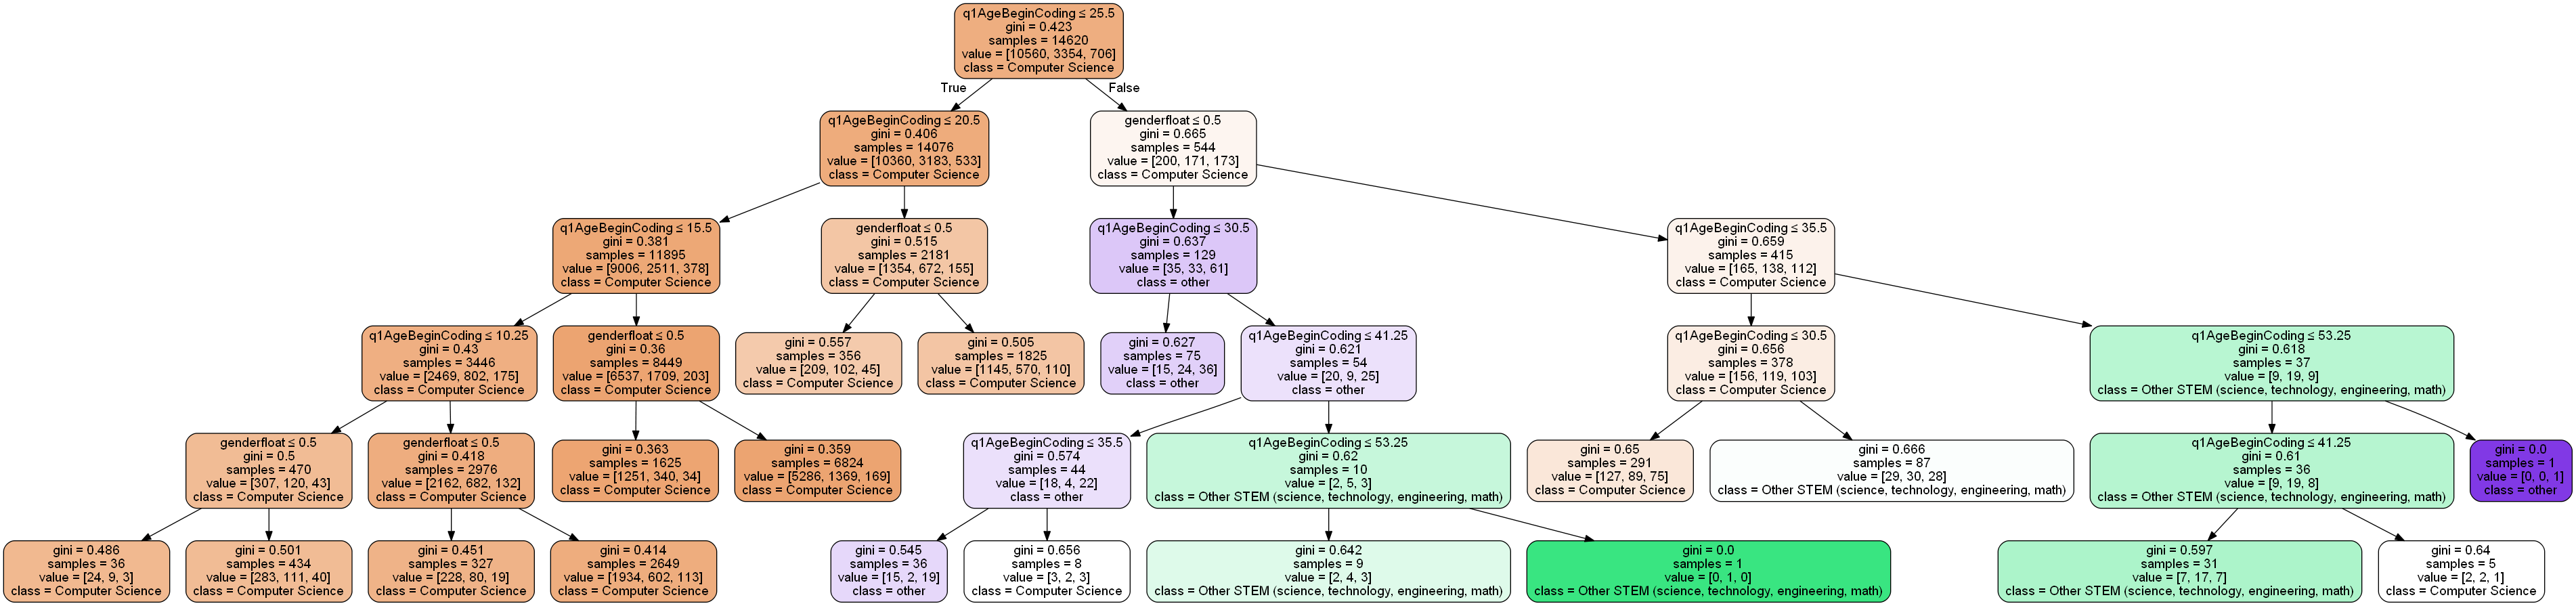

In [100]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Computer Science','Other STEM (science, technology, engineering, math)','other'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('firsttree.png')
Image(graph.create_png())

In [101]:
# Pruning the tree :

# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7285782671134514


In [102]:
##### I want to look more closely at the age begin coding, only keeping categories
# before 15  (0), 15-20  (1), over 20  (2)
begindict2= {'5 - 10 years old':0, '11 - 15 years old':0, '16 - 20 years old':1,'21 - 25 years old':2,'26 - 30 years old':2,'31 - 35 years old':2, '36 - 40 years old':2,'41 - 50 years old':2,'50+ years or older':2 }

df_tree_2 = df2.copy()

In [103]:
## Creating numerical columns for the decision tree
df_tree_2['agebegin'] = df2['q1AgeBeginCoding'].replace(begindict2)
df_tree_2['genderfloat']=[0.0 if i=='Female' else 1.0 for i in df_tree_2.q3Gender]

In [104]:
df_tree_2.columns.tolist()

['RespondentID',
 'CountryNumeric2',
 'q1AgeBeginCoding',
 'q2Age',
 'q3Gender',
 'q4Education',
 'q5DegreeFocus',
 'q6LearnCodeUni',
 'q6LearnCodeSelfTaught',
 'q6LearnCodeAccelTrain',
 'q8JobLevel',
 'q8Student',
 'q9CurrentRole',
 'q10Industry',
 'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth',
 'q13EmpMeasWhiteboard',
 'q13EmpMeasTechPhoneInt',
 'q13EmpMeasTakeHomeProject',
 'q13EmpMeasResume',
 'q13EmpMeasPastWork',
 'q16HiringManager',
 'q17HirChaInterviews',
 'q17HirChaHardAssessSkills',
 'q17HirChaNotEnoughTalent',
 'q17HirChaNoDiversCandidates',
 'q17HirChaCompfromCompanies',
 'q17HirChaJobDescript',
 'q18NumDevelopHireWithinNextYear',
 'q20CandYearExp',
 'q20CandCompScienceDegre

In [105]:
df_tree_2.CountryNumeric2=df_tree_2.CountryNumeric2.apply(lambda x: x.lower())

In [106]:
##################  Only with 1 feature


X = df_tree_2.agebegin # Features
y = df_tree_2.q5DegreeFocus # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(np.array(X_train).reshape(-1,1),y_train)

#Predict the response for test dataset
y_pred = clf.predict(np.array(X_test).reshape(-1,1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7284324669111785


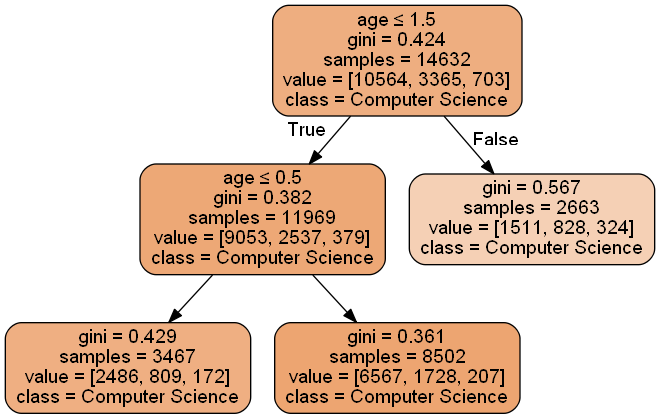

In [107]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['age'],class_names=['Computer Science','Other STEM (science, technology, engineering, math)','other'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('onefeature.png')
Image(graph.create_png())

# Adding GDP of countries

In [108]:
nangdblist= ['asia/pacific region','bermuda','british indian ocean territory','cayman islands','chennai','cn','curaçao','czechia','egypt','europe',
 'hong kong',
 'iran',
 'kyrgyzstan',
 'macao',
 'macedonia',
 'north korea',
 'palestine',
 'puerto rico',
 'republic of lithuania',
 'republic of moldova',
 'south korea',
 'swaziland',
 'syrian arab republic',
 'taiwan',
 'venezuela',
 'yemen']

In [109]:
df_tree_2.CountryNumeric2[df_tree_2.CountryNumeric2.isin(nangdblist)].unique().tolist()

['south korea',
 'curaçao',
 'egypt',
 'venezuela',
 'macedonia',
 'taiwan',
 'hong kong',
 'iran',
 'czechia',
 'republic of lithuania',
 'palestine',
 'asia/pacific region',
 'puerto rico',
 'bermuda',
 'swaziland',
 'yemen',
 'syrian arab republic',
 'republic of moldova',
 'north korea',
 'macao',
 'kyrgyzstan',
 'europe',
 'cn',
 'chennai',
 'cayman islands']

In [110]:
countrygdp=pd.read_csv('contrygdptest.csv')

In [111]:
countrygdp.columns=['CountryNumeric2','gdp']
countrygdp.CountryNumeric2=countrygdp.CountryNumeric2.str.lower()

In [112]:
df_tree_2.dropna(inplace=True)
df_tree_2.shape

(20903, 134)

In [113]:
df_tree_2['CountryNumeric2']=df_tree_2['CountryNumeric2'][df_tree_2['CountryNumeric2'].isin(countrygdp['CountryNumeric2'])]

In [114]:
gdpdict = pd.Series(countrygdp.gdp.values,index=countrygdp.CountryNumeric2).to_dict()

In [115]:
gdpdict

{'afghanistan': 19543976895.4248,
 'albania': 13038538300.2644,
 'algeria': 167555280113.181,
 'american samoa': 634000000.0,
 'andorra': 3012914131.16971,
 'angola': 122123822333.73,
 'argentina': 637430331479.469,
 'armenia': 11536590635.8268,
 'australia': 1323421072479.07,
 'austria': 416835975862.193,
 'azerbaijan': 40747792237.9735,
 'bangladesh': 249723862487.36105,
 'barbados': 4673500000.0,
 'belarus': 54456465472.6162,
 'belgium': 494763551890.776,
 'belize': 1862614800.0,
 'bermuda': 5570000000.0,
 'bolivia': 37508642112.8799,
 'bosnia and herzegovina': 18054854788.5214,
 'brazil': 2053594877013.22,
 'bulgaria': 58220973782.7715,
 'cambodia': 22158209502.6391,
 'cameroon': 34922782310.6416,
 'canada': 1647120175449.13,
 'cayman islands': 3210000000.0,
 'chile': 277075944401.94104,
 'china': 12237700000000.0,
 'colombia': 314457601859.523,
 'costa rica': 57285984447.7113,
 "cote d'ivoire": 37353276059.2518,
 'croatia': 55213087270.6341,
 'cuba': 96851000000.0,
 'curaçao': 312

In [116]:
df_tree_2['gdp']=df_tree_2['CountryNumeric2'].replace(gdpdict)


In [117]:
df_tree_2['gdp'].head()

0    1.619420e+12
1    1.121542e+11
2    3.147103e+11
3    3.120000e+09
5    1.948540e+13
Name: gdp, dtype: float64

In [118]:
df_tree_2['normalized_gdp']=(df_tree_2['gdp']-df_tree_2['gdp'].mean())/df_tree_2['gdp'].std()

In [119]:
df_tree_2['normalized_gdp_2']=(df_tree_2['gdp']-df_tree_2['gdp'].min())/(df_tree_2['gdp'].max()-df_tree_2['gdp'].min())

In [120]:
df_tree_2.head()

RespondentID CountryNumeric2   q1AgeBeginCoding              q2Age  \
0    6464453728     south korea  16 - 20 years old  18 - 24 years old   
1    6478031510         ukraine  16 - 20 years old  25 - 34 years old   
2    6464392829        malaysia  11 - 15 years old  12 - 18 years old   
3    6481629912         curaçao  11 - 15 years old  12 - 18 years old   
5    6463843138   united states  41 - 50 years old  35 - 44 years old   

  q3Gender                          q4Education  \
0   Female                         Some college   
1     Male  Post graduate degree (Masters, PhD)   
2   Female                         Some college   
3     Male                     College graduate   
5     Male                     College graduate   

                                       q5DegreeFocus        q6LearnCodeUni  \
0                                   Computer Science  School or university   
1  Other STEM (science, technology, engineering, ...  School or university   
2  Other STEM (science, technology, engineering, ...  School or university   
3                                   Computer Science             no_answer   
5                                   Computer Science  School or university   

              q6LearnCodeSelfTaught                 q6LearnCodeAccelTrain  \
0  Self-taught (i.e. books, online)                             no_answer   
1  Self-taught (i.e. books, online)                             no_answer   
2                         no_answer  Accelerated training (i.e. bootcamp)   
3  Self-taught (i.e. books, online)                             no_answer   
5                         no_answer                             no_answer   

   ...                                 q30LearnCodeMOOC  \
0  ...                                        no_answer   
1  ...  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   
2  ...                                        no_answer   
3  ...                                        no_answer   
5  ...  MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)   

  q30LearnCodeCompCodingSites q30LearnCodeOnlineTutorial q30LearnCodeBooks  \
0                   no_answer                  no_answer         no_answer   
1                   no_answer                  no_answer             Books   
2                   no_answer                  no_answer         no_answer   
3                   no_answer                  no_answer         no_answer   
5                   no_answer                  no_answer             Books   

  q30LearnCodeAcademicPaper agebegin genderfloat           gdp normalized_gdp  \
0                 no_answer        1         0.0  1.619420e+12      -0.580432   
1                 no_answer        1         1.0  1.121542e+11      -0.780830   
2           Academic papers        0         0.0  3.147103e+11      -0.753899   
3                 no_answer        0         1.0  3.120000e+09      -0.795326   
5                 no_answer        2         1.0  1.948540e+13       1.794926   

  normalized_gdp_2  
0         0.083109  
1         0.005756  
2         0.016151  
3         0.000160  
5         1.000000  

[5 rows x 137 columns]

# Testing some correlations with new dummies

In [121]:
df_tree_2[['genderfloat','agebegin']].corr()

genderfloat  agebegin
genderfloat      1.00000  -0.06998
agebegin        -0.06998   1.00000

# GDP Tree

In [122]:
# before 15  (0), 15-20  (1), over 20  (2)
# gender : 0.0 women, 1.0 men

In [123]:
df_tree_2.dropna(inplace=True)

In [124]:
feature_cols = ['genderfloat','normalized_gdp_2']
X = df_tree_2[feature_cols] # Features
y = df_tree_2.q5DegreeFocus # Target variable

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [126]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7239067985955953


In [127]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[4523   19   10]
 [1424   11    1]
 [ 271    5    2]]
                                                     precision    recall  f1-score   support

                                   Computer Science       0.73      0.99      0.84      4552
Other STEM (science, technology, engineering, math)       0.31      0.01      0.01      1436
                                              other       0.15      0.01      0.01       278

                                          micro avg       0.72      0.72      0.72      6266
                                          macro avg       0.40      0.34      0.29      6266
                                       weighted avg       0.61      0.72      0.61      6266



In [128]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Computer Science','Other STEM (science, technology, engineering, math)','other'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gdptree.png')
Image(graph.create_png())

# Way too big !